In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2
from __future__ import division

plt.style.use('ggplot')
np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",",dtype='int')[1:] # don't want first row (labels)
data = csv
print data[::1000]
sizes = [len(np.unique(data[:, i])) for i in range(3)]
ranges = [(np.max(data[:, i]), np.min(data[:,i])) for i in range(3)]
ranges_diff = [np.max(data[:, i])-np.min(data[:,i]) for i in range(3)]
print np.max(data[:,3])
print sizes
print ranges
print ranges_diff
for i, ax in zip(range(3), ['x', 'y', 'z']):
    print ax + '-axis: '
    print 'unique bins (in data): ', np.unique(data[:, i]).size
    print 'bin length: ', np.unique(data[:, i])[1]-np.unique(data[:, i])[0]
    print np.unique(data[:, i])
    print

[[    19   1369     55   5063      0]
 [    58   2851   1165      0      0]
 [   136   2344   1054   3042      0]
 [   214   1837    943   3224      0]
 [   253   3358    832      0      0]
 [   331   2851    721  82193     87]
 [   409   2344    610 118055    147]
 [   487   1837    499 153461    205]
 [   526   3358    388      0      0]
 [   604   2851    277  61430     20]
 [   682   2344    166 132042    177]
 [   760   1837     55 153350    177]
 [   799   3319   1165  15316      7]
 [   877   2812   1054 152682    194]
 [   955   2305    943 138771    286]
 [  1033   1798    832 134847    186]
 [  1072   3319    721      0      0]
 [  1150   2812    610 126243    115]
 [  1228   2305    499 150331    178]
 [  1306   1798    388 150579    263]
 [  1345   3319    277      0      0]
 [  1423   2812    166 134814     83]
 [  1501   2305     55 133161    132]
 [  1579   1759   1165 159705    207]
 [  1618   3280   1054   5186      0]
 [  1696   2773    943 152424    120]
 [  1774   2

Seems that the coordinates in our data set line up with the viz.neurodata coordinates at resolution 5. To demonstrate why this seems likely to be true, markers have been placed at (0, 0), (4192, 0), (0, 3358), (4192, 3358)--i.e. corners of the boundary--and an image of these markers at resolution 8 is shown below.

<img src="viz_bounds.png" style="width:400px">

Inspecting the JS/html more we see that the actual number of pixels at resolution 5 is 4232x3744, and as we decrease resolution the pixels are doubled. Assuming the data coordinates mark bin centers (to explain the offset of the initial x). 

Now just need to figure out z-axis. The z values in the image data go from 2917-4156, which is a range of 

In [2]:
print (2917-4156)*-1

1239


So it seems that the z-values in the data correspond approximately to the z-values in the image data, other than a translation of 2917.

### Grabbing images from website
Looking through the JavaScript/HTML page source code on viz.neurodata.io, we see that its tiling with 512x512 .png images, and that the actual pixel resolution and resolution according to the website correspond. 

I will define image grabber functions in a seperate python module.

In [3]:
from image_scraping_jay import *

## Testing the image scraper w/ some exploratory questions

max synapses:  507
unmasked value:,  [[149991]]


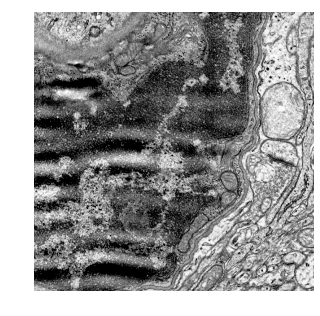

In [37]:
from IPython.display import Image, HTML, display

m = np.max(data[:, -1])
a = np.where(data[:, -1]==m)
print 'max synapses: ', m
print 'unmasked value:, ', data[a,-2]
args = list(*data[a, (0, 1, 2)])+[1]
img_max = bin_to_nparray(*args)
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img_max, cmap='Greys_r')
plt.axis('off')
plt.show()

The above *should* be image of the bin where maximal number of synapses occured. Let's look at the corresponding synapse overlay annotation image.

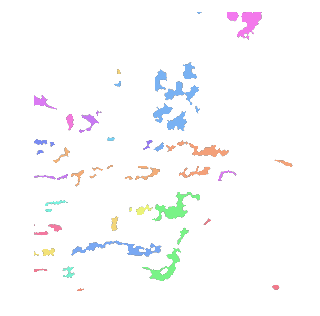

In [5]:
args += [True]
img_max_overlay = bin_to_nparray(*args)
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img_max_overlay, cmap='Greys_r')
plt.axis('off')
plt.show()

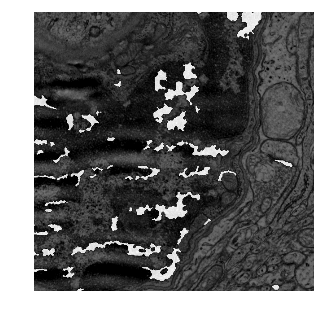

In [6]:
# now add the two images
stacked = img_max_overlay[:,:,-1]+img_max*.5
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(stacked, cmap='Greys_r')
plt.axis('off')
plt.show()

### What do high density and low density regions look like?

0.0010395174988
min density [   19.  1369.    55.]


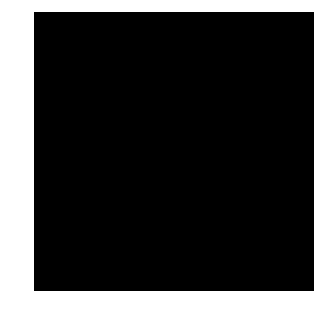

max density 0.0036844513805


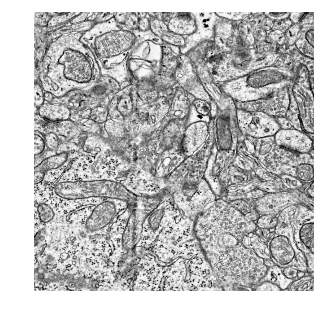

w/ overlay


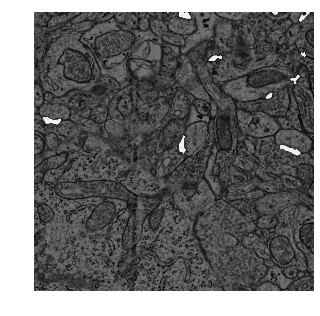

In [45]:
dens_data = np.copy(data).astype(float)
dens_data = dens_data[np.where(dens_data[:,3] != 0)]
dens_data[:, 3] = dens_data[:, 4]/dens_data[:, 3]
dens_data = dens_data[:,:-1]
print np.average(dens_data[:,-1])
a = np.argmin(dens_data[:, -1])
# min density
print "min density", dens_data[a, :-1]
img = bin_to_nparray(*dens_data[a, :-2])
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

# max density
a = np.argmax(dens_data[:, -1])
print "max density", dens_data[a, -1] 
img = bin_to_nparray(*dens_data[a, :-2])
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print "w/ overlay"
img = bin_and_overlay_to_nparray(*dens_data[a, :-2])
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

Black regions most likely are masked regions, thus it is actually not surprising too see large amounts of masked for low density areas (since low unmasked increases density, but at the same time lowers synaptic probability). It also interesting to note that there are not many synapses on the max density image (see w/ overlay), this could be because unmasked does not only manifest as black; that is things that show up as, say cell bodies, could be getting masked also, despite note showing as black on the image. Furthermore, note that the data is binned across many z-slices, while here, we are only looking at one z-slice at a time, thus it is plausible for a low density bin to have an entire slice masked. This also indicates that it would be beneficial to write a function that computes pixel-wise average across z-slices for a bin and returns the corresponding image. We can also only look at the more 'cleaned' data, as many boundary points are likely to be picked up here.

### A significant number of the bins were cut off below a given threshold on the y-axis before the data was given to us... What does that line look like?

Since it appears that the coordinates in our data correspond to the center of a bin, we can see that there was no cut applied on the x-axis, since data starts at 19 and bin "length" is 40, and similarly no cut along z since data starts at 55 and bin "depth" is 110. But along the y-axis data starts at 1369; floor(1369/40)=34, meaning the first 34 bins along the y-axis was cut across all data.

2105.5 1369 610.0


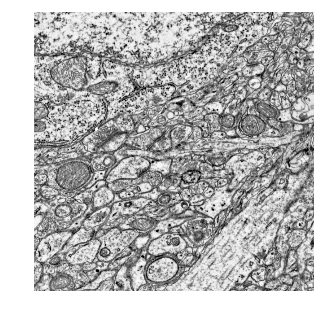

In [8]:
# fairly arbitrarily, look at midpoint for x and z
midx, midz = [np.median(np.unique(data[:, i])) for i in [0,2]]
y = np.min(data[:, 1])
print midx, y, midz
img = bin_to_nparray(int(midx), int(y), int(midz))
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

In [9]:
# nothing apparently notable, lets view across entire x-axis
from itertools import groupby

urls = [k for k,_ in groupby(
        [get_image_url(x, y, midz, 3) 
         for x in np.sort(np.unique(data[:, 0]))])]
imgTags = ''.join( ["<img style='width: 20px; margin: 0px; padding-bottom: 3px; float: left;' src='%s' />" % str(u) 
                     for u in urls ])
display(HTML(imgTags))

# y value below cutoff
urls = [k for k,_ in groupby(
        [get_image_url(x, 39*10, midz, 3) 
         for x in np.sort(np.unique(data[:, 0]))])]
imgTags = ''.join( ["<img style='width: 20px; margin: 0px; padding-bottom: 3px; float: left;' src='%s' />" % str(u) 
                     for u in urls ])
display(HTML(imgTags))

First row shows where the data was sliced, second is somewhere before it was sliced (that is, data not included in the set)... Since these black regions probably correspond to regions that are heavily masked, perhaps this is why data split here?

In [10]:
# what bins along this y value have unmasked = 0?
for row in data[np.where(data[:, 1] == y)]:
    if row[3] == 0: print row
print np.average(data[np.where(data[:, 1] == y+39*2), 3])

[  19 1369 1165    0    0]
[  58 1369 1165    0    0]
[  97 1369 1165    0    0]
[ 136 1369 1165    0    0]
[4114 1369 1165    0    0]
[4153 1369 1165    0    0]
[4192 1369 1165    0    0]
118932.739899


In [11]:
# do same thing for z = 1165, since we observe this is where all the unmasked = 0 bins occur

urls = [k for k,_ in groupby(
        [get_image_url(x, y, 1165, 3) 
         for x in np.sort(np.unique(data[:, 0]))])]
imgTags = ''.join( ["<img style='width: 20px; margin: 0px; padding-bottom: 3px; float: left;' src='%s' />" % str(u) 
                     for u in urls ])
display(HTML(imgTags))

Let's confirm that black regions do infact correspond to low unmasked.

## What's unmasked = 0 look like?

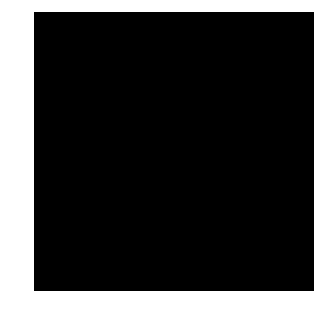

In [12]:
a, = np.where(data[:, 3] == 0)
# first unmasked = 0
args = list(data[a[0], (0, 1, 2)])
img = bin_to_nparray(*args)
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

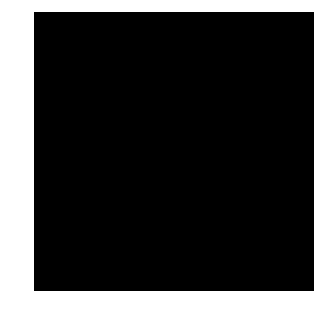

In [13]:
# middle one
args = list(data[a[a.size//2], (0, 1, 2)])
img = bin_to_nparray(*args)
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

Seems to be working... Another sanity check: if at resolution 0, the tiles returned contain 512 pixels, and that doubles as resolution increases, the number of pixels, at resolution r should be 512x2^r.
Therefore resoltuion 8 should return approximately the entire cross section, since 512x2^8=131072, which is approximately the total number of pixels along the x-axis (135424). Let's test this out by grabbing the first z-layer's tile at the origin for resolution 8, i.e. the tile with url http://openconnecto.me/ocp/catmaid/bock11/image/xy/2917/0_0_8.png.

<img style='width: 250px' src='http://openconnecto.me/ocp/catmaid/bock11/image/xy/2917/0_0_8.png'/>

Seems to be correct.

# Images within context of previous analyses

### Plot density clusterings on top of image data, will help visualize what high synaptic density areas look like, and (hopefully) help visualize the clustering results

In [14]:
# get the clean data
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data = csv[indices_in_bound]

First use density based clustering, taken from Assignment11_jay.ipynb part 1.

In [15]:
import sklearn.mixture as mixture

# create vector of just densities
dens_vec = (data[:, 4]/data[:, 3])
# normalize
dens_vec = (dens_vec-np.average(dens_vec))/np.std(dens_vec)
dens_vec = np.reshape(dens_vec, (dens_vec.shape[0], 1))
n_clusters = 5
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(dens_vec)

# look at xy plane along middle z
z = int(midz)
xsort = np.sort(np.unique(data[:, 0]))
ysort = np.sort(np.unique(data[:, 1]))

(78, 78)


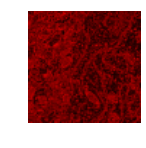

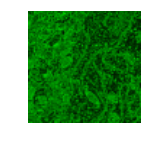

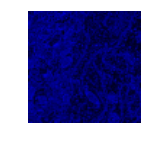

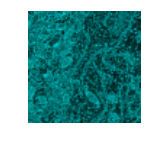

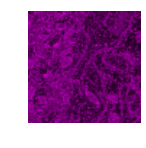

In [16]:
# choose a smaller resolution
res = 4
bin_size = np.shape(bin_to_nparray(xsort[0], ysort[0], z, res))
coords = data[:,(0,1,2)]
print bin_size
n = bin_size[0]
def label_to_color(img, l):
    zero = np.zeros(img.shape)
    if l == 0:
        return np.dstack((img, zero, zero))
    if l == 1:
        return np.dstack((zero, img, zero))
    if l == 2:
        return np.dstack((zero, zero, img))
    if l == 3:
        return np.dstack((zero, img, img))
    if l == 4:
        return np.dstack((img, zero, img))
# test colors
test_img = bin_to_nparray(xsort[5], ysort[5], z, res)
for l in range(5):
    img = label_to_color(test_img, l)
    plt.figure(figsize=(2, 2), frameon=False)
    plt.imshow(img, cmap='Greys_r')
    plt.axis('off')
    plt.show()

In [17]:
total_img = np.empty((len(ysort)*n, len(xsort)*n, 3))

for i, x in enumerate(xsort):
    for k, y in enumerate(ysort):
        img = bin_to_nparray(x, y, z, res)
        a, = np.where(np.all(coords[:,]==[x,y,z],axis=1))
        total_img[k*n:(k+1)*n, i*n:(i+1)*n, :] = label_to_color(img, labels[a])

(3198, 6318, 3)


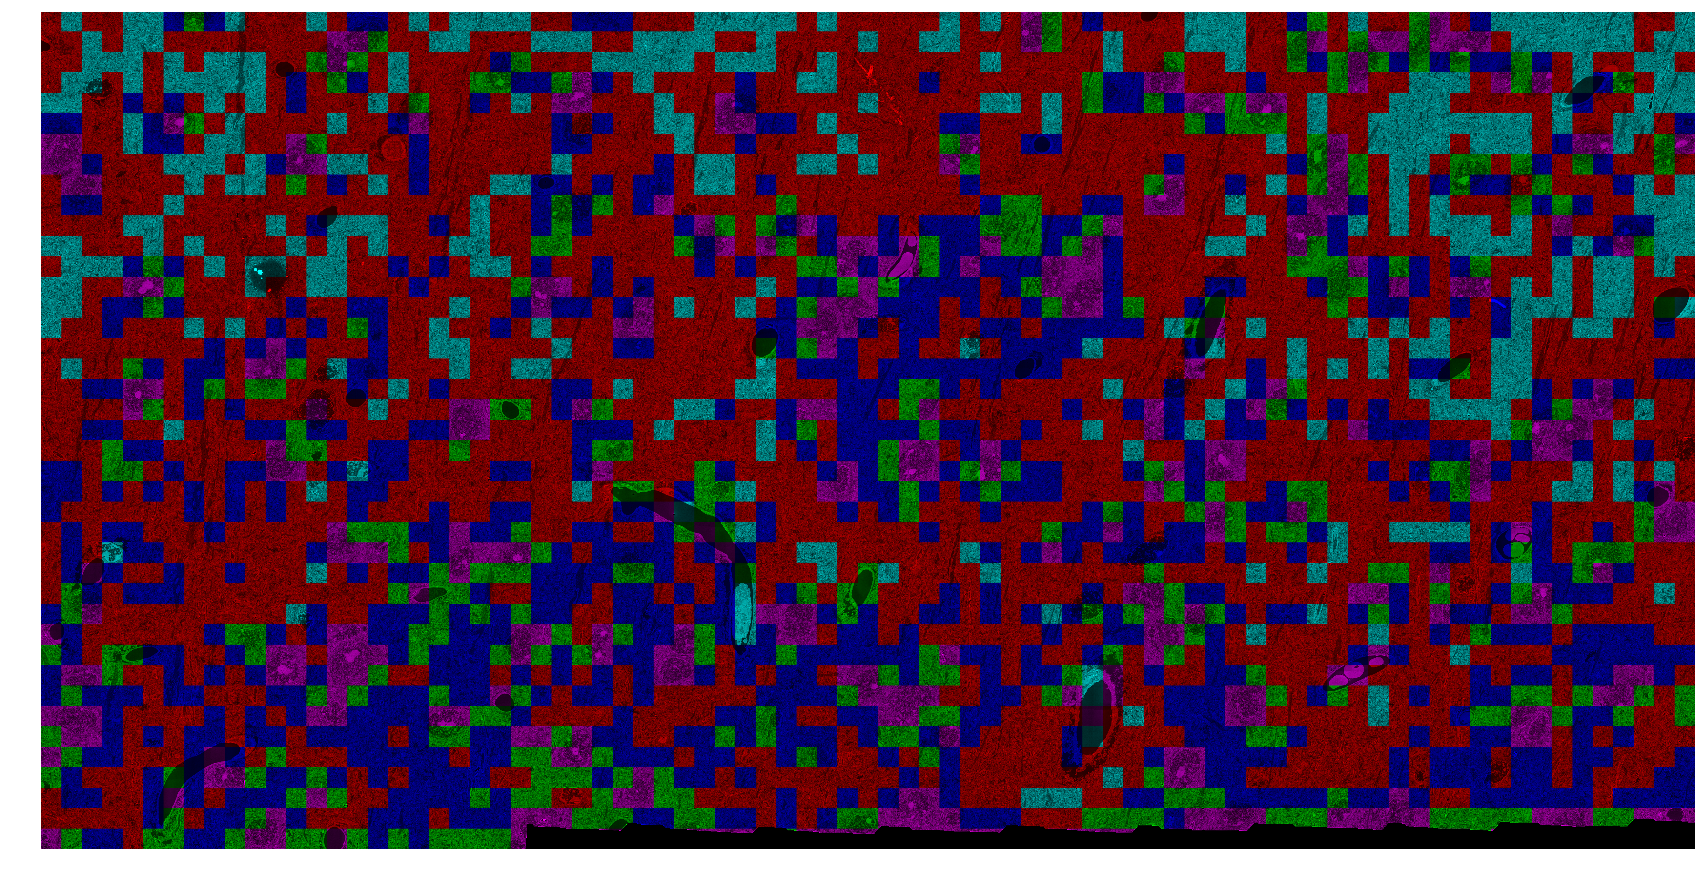


    -cluster with mean 0.377768343058 has color red 
        - size of cluster = 74135
    

    -cluster with mean -0.492152146256 has color green 
        - size of cluster = 19190
    

    -cluster with mean 0.0973483850595 has color blue 
        - size of cluster = 48315
    

    -cluster with mean 0.750755020588 has color cyan 
        - size of cluster = 19550
    

    -cluster with mean -1.56429494848 has color magenta 
        - size of cluster = 18990
    


In [18]:
print total_img.shape
plt.figure(figsize=(30, 15), frameon=False)
plt.imshow(total_img, cmap='Greys_r')
plt.axis('off')
plt.show()

colors = ['red', 'green', 'blue', 'cyan', 'magenta']
for mean, c, l in zip([m[0] for m in gmm.means_], colors, range(5)):
    size = data[labels == l].size
    print """
    -cluster with mean %s has color %s 
        - size of cluster = %s
    """ % (str(mean), c, str(size))

What does max density bin, given this z value, w/ synapse overlay look like?

(3321, 5) (3321, 1)
4.48782755814
[  1735   2695    610 124722    371]


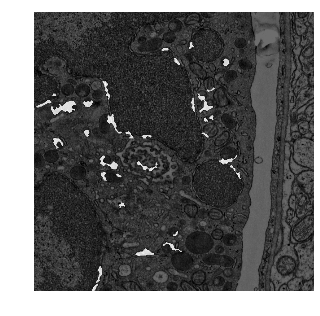

In [19]:
a = np.where(data[:,2] == z)
dens_vec_z = dens_vec[a]
data_z = data[a]
print data_z.shape, dens_vec_z.shape
print np.max(dens_vec_z)
b = np.argmax(dens_vec_z)
print data_z[b]
img = bin_and_overlay_to_nparray(*data_z[b, (0, 1, 2)])
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

In [20]:
from scipy.stats import mode

zsort = np.sort(np.unique(data[:, 2]))
label_array = np.ones((len(ysort), len(xsort), len(zsort)))*-1
total_img = np.zeros((len(ysort)*n, len(xsort)*n, 3))
one_mat = np.ones((n, n))
for i, x in enumerate(xsort):
    for k, y in enumerate(ysort):
        for j, z in enumerate(zsort):
            a, = np.where(np.all(coords[:,]==[x,y,z],axis=1))
            if a.size == 0:
                continue
            label_array[k, i, j] = labels[a]
        m = mode(label_array[k, i, :])
        m = int(m[0])
        if m == -1:
            continue
        total_img[k*n:(k+1)*n, i*n:(i+1)*n, :] = label_to_color(one_mat, m)
        

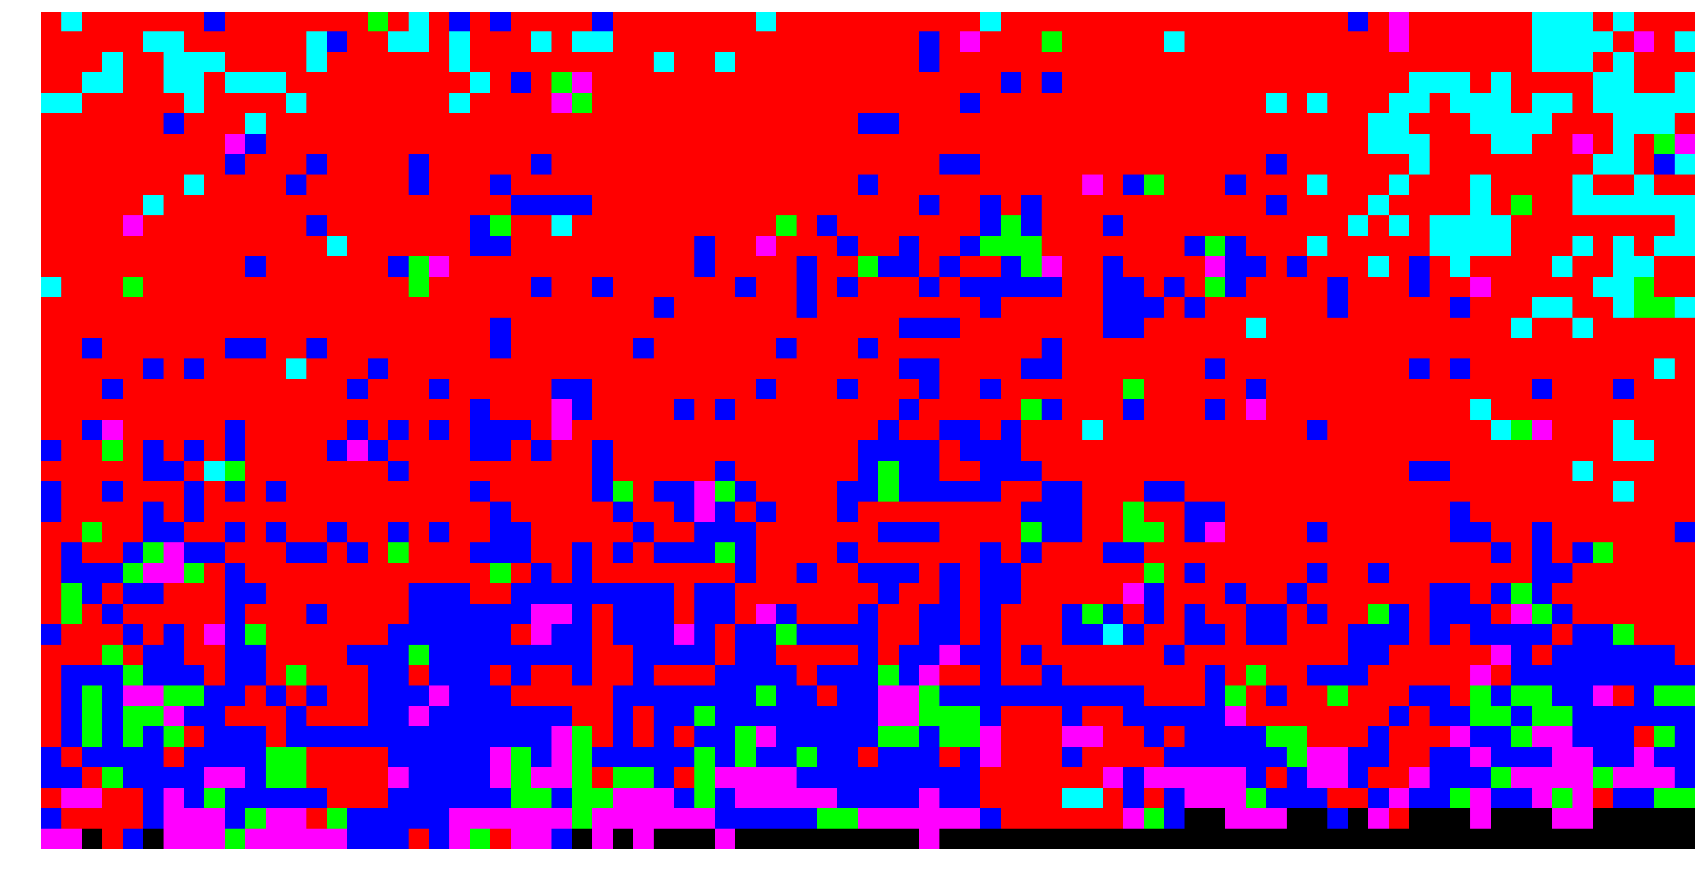


    -cluster with mean 0.377768343058 has color red 
        - size of cluster = 74135
    

    -cluster with mean -0.492152146256 has color green 
        - size of cluster = 19190
    

    -cluster with mean 0.0973483850595 has color blue 
        - size of cluster = 48315
    

    -cluster with mean 0.750755020588 has color cyan 
        - size of cluster = 19550
    

    -cluster with mean -1.56429494848 has color magenta 
        - size of cluster = 18990
    


In [21]:
plt.figure(figsize=(30, 15), frameon=False)
plt.imshow(total_img, cmap='Greys_r')
plt.axis('off')
plt.show()

colors = ['red', 'green', 'blue', 'cyan', 'magenta']
for mean, c, l in zip([m[0] for m in gmm.means_], colors, range(5)):
    size = data[labels == l].size
    print """
    -cluster with mean %s has color %s 
        - size of cluster = %s
    """ % (str(mean), c, str(size))

### Does averaging an image across slices return anything meaningful?

In [22]:
# bin length along z axis is 111 px
# lets try with 20 px just to see, since loading images takes awhile
img_avg = np.zeros(bin_to_nparray(2000, 2000, res=1).shape)
for z in range(20):
    print z
    img_avg += bin_to_nparray(1735, 2695, 610+z, res=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


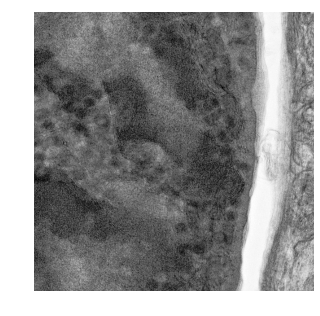

In [23]:
img_avg /= 20
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img_avg, cmap='Greys_r')
plt.axis('off')
plt.show()

In [24]:
# try with overlays
img_avg = np.zeros(bin_to_nparray(2000, 2000, res=1, overlay=True).shape)
for z in range(20):
    print z
    img_avg += bin_to_nparray(1735, 2695, 610+z, res=1, overlay=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


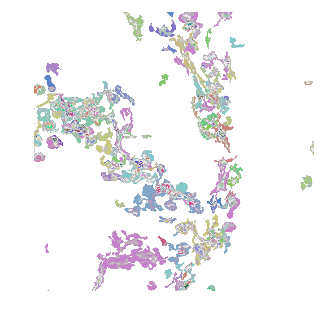

In [25]:
img_avg /= 20
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img_avg, cmap='Greys_r')
plt.axis('off')
plt.show()

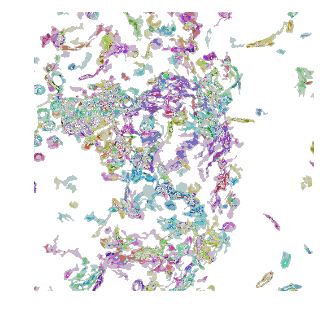

In [26]:
# this image seems more informative, now lets average across entire bin, aka 111 zvaues
img_avg = np.zeros(bin_to_nparray(2000, 2000, res=1, overlay=True).shape)
for z in range(111):
    img_avg += bin_to_nparray(1735, 2695, 610+z, res=1, overlay=True)
img_avg /= 111
plt.figure(figsize=(5, 5), frameon=False)
plt.imshow(img_avg, cmap='Greys_r')
plt.axis('off')
plt.show()

# Qualitative evaluation of 'unmasked'

To get a better understanding of 'unmasked' we can render an xy-plane as before, but this time we will render each bin such that its brightness corresponds to the ratio between its unmasked value, and the maximum unmasked value for this plane. That is, the darker a bin appears the lower its unmasked value is--bins where unmasked is 0 will be completely dark, and bins with maximal unmasked will appear the same as the true image grabbed from the viz. This will give us a very high-level understanding of how the masking algorithm works. Additionally, by comparing this image along side with the image of this xy-plane that colored bins based on density cluster, we can see how the unmasked value tends to affect the density (although we already have a general understanding of this, this is more just as a confirmation of that understanding).

In [32]:
total_img = np.zeros((len(ysort)*n, len(xsort)*n))
z = int(midz)
max_unmasked = np.max(data_z[:, 3])
print max_unmasked
res = 4

146688


In [36]:
for i, x in enumerate(xsort):
    for k, y in enumerate(ysort):
        img = bin_to_nparray(x, y, z, res)
        a, = np.where(np.all(coords[:,]==[x,y,z],axis=1))
        if len(a) != 1:
            print len(a)
            continue
        unmasked = data[a, 3]
        ratio = unmasked/max_unmasked
        total_img[k*n:(k+1)*n, i*n:(i+1)*n] = img*ratio

(3198, 6318)


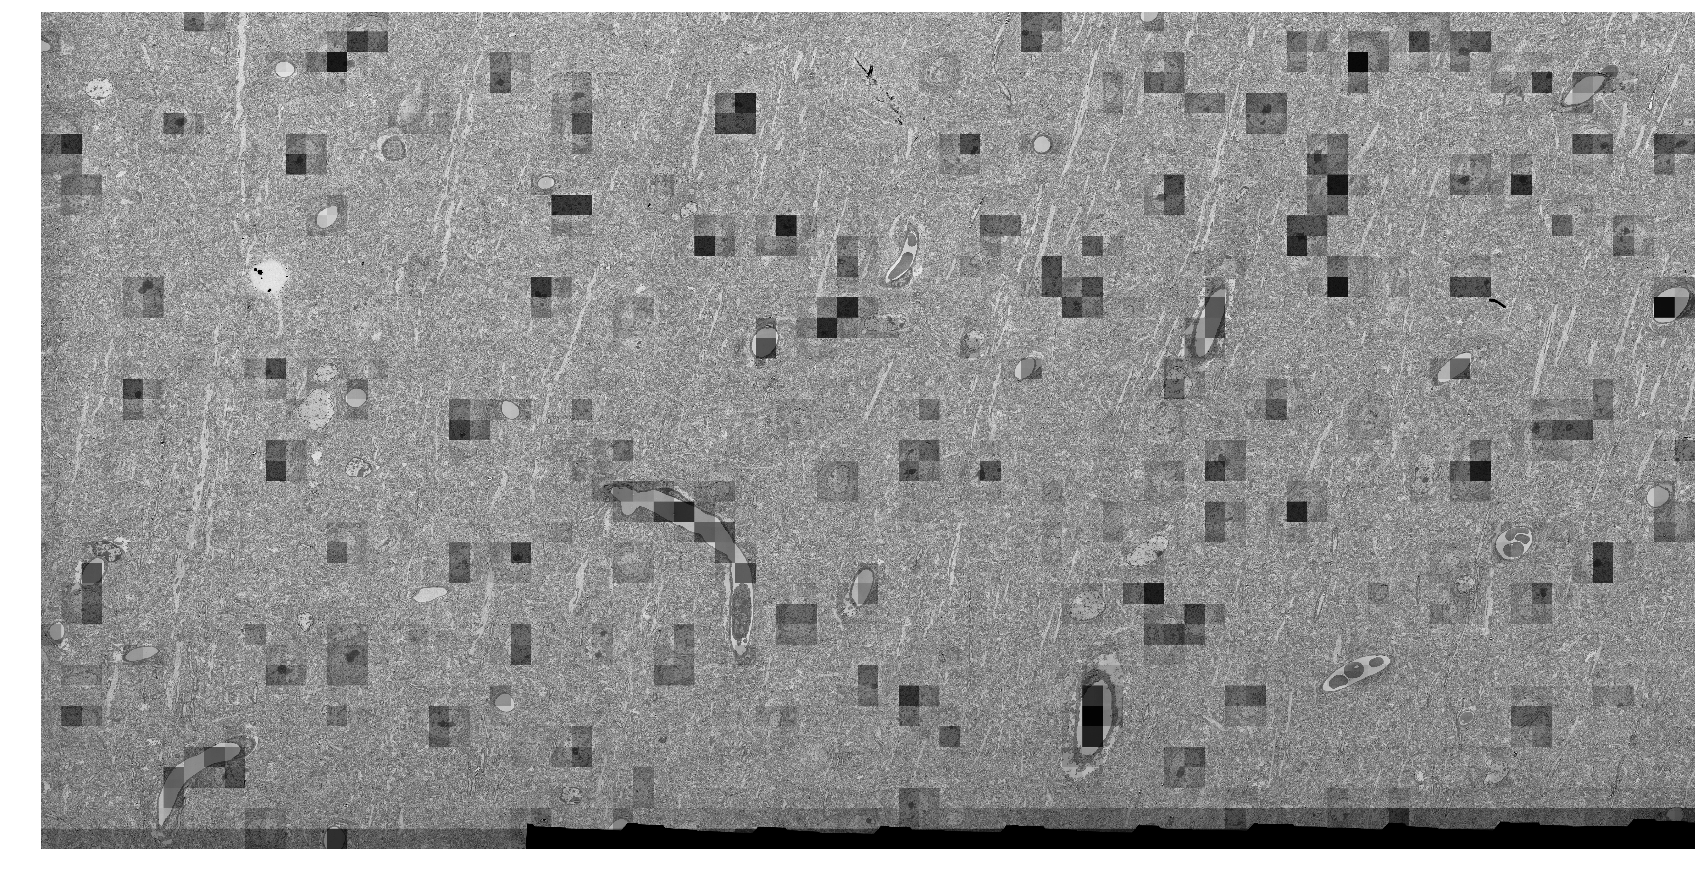

In [46]:
print total_img.shape
plt.figure(figsize=(30, 15), frameon=False)
plt.imshow(total_img, cmap='Greys_r')
plt.axis('off')
plt.show()